In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.html.widgets import interact 
from IPython.html.widgets import interactive
import random as ra
def Ma(a1=1,a2=-2):
  P=np.array([[1,1],[1,-1]])
  iP=np.linalg.inv(P)
  L=np.array([[a1,0],[0,a2]])
  A=P@L@iP

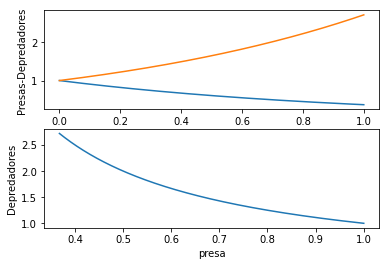

/tmp/ipykernel_64727/1119151585.py:46: RuntimeWarning: invalid value encountered in true_divide
  uu = uu / norm
/tmp/ipykernel_64727/1119151585.py:47: RuntimeWarning: invalid value encountered in true_divide
  vv = vv / norm


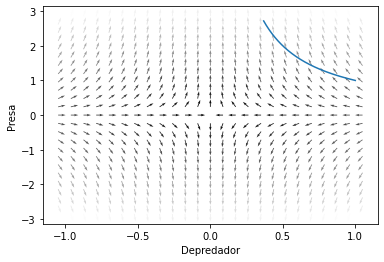

In [2]:


## definición de la función
def df_dt(x, t,a1,a2,a3,a4):
    ## coexistencia
    dx=a1*x[0]+a2*x[1]
    dy=a3*x[0]+a4*x[1]
    return np.array([dx,dy])



# solucion de la ecuacion via metodos numericos 
# para las condiciones iniciales particular
def sol_particular(a1=-1,a2=0,a3=0,a4=1):
  # Condiciones iniciales
  x0 = 1   # Compradores
  y0 = 1    # Vendedores
  conds_iniciales = np.array([x0, y0])
  tf = 1
  N = 800
  t = np.linspace(0, tf, N)
  X = odeint(df_dt, conds_iniciales, t,args=(a1,a2,a3,a4))
  # grafica de la ecuacion
  fig,ax=plt.subplots(2,1)
  ax[0].plot(t, X[:, 0], label='presa')
  ax[0].plot(t, X[:, 1], label='depredador')
  ax[0].set_xlabel('Tiempo')
  ax[0].set_ylabel('Presas-Depredadores')
  #ax[0].rcParams["figure.figsize"] = (10,10)
  ax[1].plot(X[:, 0],X[:, 1], label='presa')
  ax[1].set_xlabel('presa')
  ax[1].set_ylabel('Depredadores')
  #ax[1].rcParams["figure.figsize"] = (10,10)
  plt.show()
  return X



## Campo de pendientes
def campo(X,a1=-1,a2=0,a3=0,a4=1):
  x_max = np.max(X[:,0]) * 1.05
  y_max = np.max(X[:,1]) * 1.05
  x = np.linspace( -x_max, x_max, 25)
  y = np.linspace(-y_max, y_max, 25)
  xx, yy = np.meshgrid(x, y)
  uu, vv = df_dt((xx, yy), 0,a1,a2,a3,a4)
  norm = np.sqrt(uu**2 + vv**2)
  uu = uu / norm
  vv = vv / norm
  plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
  plt.xlabel('Depredador')
  plt.ylabel('Presa')
  plt.plot(X[:, 0],X[:, 1])
  np.random.seed(5)
X=sol_particular()
campo(X)
